In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [11]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])


train_dataset=datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=transform

)

test_dataset=datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=transform
    
)

In [12]:
len(train_dataset)

60000

In [13]:
len(test_dataset)

10000

### Create Data Loader

In [15]:
train_loader=DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=64,shuffle=True)

data_iter=iter(train_loader)
images,labels=next(data_iter)

In [19]:
images[0].squeeze().shape

torch.Size([28, 28])

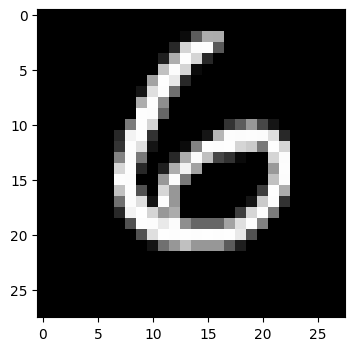

In [22]:
plt.figure(figsize=(4,4))
plt.imshow(images[0].squeeze(),cmap='gray')
plt.show()

In [26]:
labels[0].item()

6

### Define the Neural Network class

In [ ]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Flatten(),# convert 28 by 28 grid in to a single flat Array of 784 elements
            nn.Linear(784,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    def forward(self,x):
        return self.network(x)

In [30]:
model=DigitClassifier()
optimizer=optim.Adam(model.parameters(),lr=0.001)
criterion=nn.CrossEntropyLoss() ##in binary binary cross entropy,multiclas classifications cross entropy loss

In [31]:
epochs = 5

for epoch in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        #forward pass
        outputs=model(images)
        loss=criterion(outputs,labels)
        running_loss=running_loss+loss.item()
        #backward pass
        optimizer.zero_grad()
        loss.backward()
        #update weights
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}] , Loss :{running_loss/len(train_loader):.2f} ')

    


Epoch [1/5] , Loss :0.39 
Epoch [2/5] , Loss :0.19 
Epoch [3/5] , Loss :0.13 
Epoch [4/5] , Loss :0.11 
Epoch [5/5] , Loss :0.09 


In [33]:
len(test_loader)

157

In [43]:
model.eval()
total=0
correct=0
with torch.no_grad():
    for images,labels in test_loader:
        outputs=model(images)
        _,predicted=torch.max(outputs.data,1)
        correct=correct+(predicted==labels).sum().item()
        total=total+labels.size(0)
        
print(f'Accuracy on the test set:{100*correct/total :.2f}')


Accuracy on the test set:96.74


Confussion matrix

In [44]:
#testing the model
model.eval()  # switch to evaluation mode 

all_predicted= []
all_labels= []

with torch.no_grad():
    for images,labels in test_loader:
        outputs=model(images)
        _,predicted=torch.max(outputs.data,1)

        #Append labels and prediction lists
        all_labels.extend(labels.numpy())
        all_predicted.extend(predicted.numpy())


In [47]:
from sklearn.metrics import classification_report

report=classification_report(all_labels,all_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.98      0.97      1032
           3       0.98      0.94      0.96      1010
           4       0.99      0.97      0.98       982
           5       0.96      0.97      0.96       892
           6       0.94      0.98      0.96       958
           7       0.94      0.97      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.97      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(all_labels,all_predicted)
cm

array([[ 965,    0,    2,    1,    0,    2,    7,    1,    1,    1],
       [   0, 1127,    2,    0,    0,    0,    2,    0,    4,    0],
       [   3,    1, 1014,    0,    2,    0,    3,    6,    3,    0],
       [   0,    4,   16,  946,    0,   20,    1,   13,    5,    5],
       [   0,    0,    4,    0,  948,    1,   11,    1,    3,   14],
       [   1,    1,    0,    7,    1,  864,   12,    1,    2,    3],
       [   4,    3,    3,    0,    1,    2,  941,    2,    2,    0],
       [   1,    7,   16,    0,    0,    0,    2,  998,    2,    2],
       [   3,    1,    8,    5,    1,    3,   18,   13,  922,    0],
       [   1,    9,    1,    5,    6,    8,    3,   22,    5,  949]],
      dtype=int64)

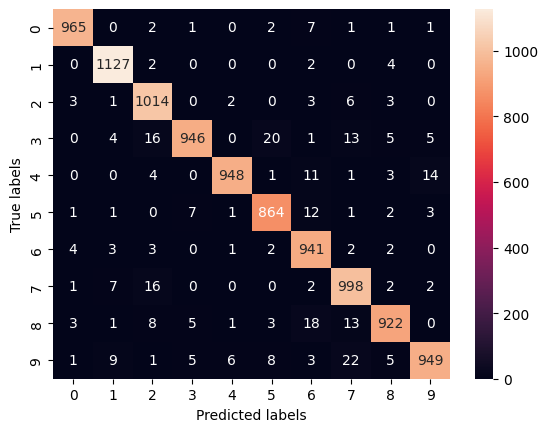

In [54]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()